In [13]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
df = pd.read_excel(r'../国家全称_译_删除已完成_(整合版)-00.xlsx')
df

,序号,公开(公告)号,标题,专利类型,法律状态/事件,申请日,授权日,发明人,简单同族专利申请数量,摘要,...,引用专利,引用专利数量,非专利引用文献数量,许可类型,5年内被引用次数,质押人,申请年,发明人(全英),摘要(全英),标题(全英)
0,875.0,AP6645A,Fertilizer absorption improvement method,授权发明,授权,2019-05-29,2023-02-03,SATO Takashi,1,The present invention addresses the problem of...,...,-,0,0,-,0,-,2019,SATO Takashi,The problem solved by the present invention is...,Fertilizer absorption improvement method
1,1001.0,AR112236A1,PESTICIDA,发明申请,撤回-视为撤回,2018-05-03,-,MURPHY BROOK C. | SOON TEO ENG,3,The present invention relates to a pesticide n...,...,-,0,0,-,0,-,2018,MURPHY BROOK C. | SOON TEO ENG,The present invention relates to a pesticide n...,pesticide
2,1813.0,AT1005298T,Teilchenförmige konstrukte zur freisetzung von...,授权发明,授权 | 放弃-视为放弃,2005-07-19,2018-06-06,"MAYER, LAWRENCE, D. | PRUD'HOMME, ROBERT, K. |...",14,Particulate constructs stabilized by amphiphil...,...,-,0,0,-,0,-,2005,"MAYER, LAWRENCE, D. | PRUD'HOMME, ROBERT, K. |...",Microparticle constructs stabilized by an amph...,Technical forms of structural liberalization
3,1476.0,AT1070095T,Neue synthetische antimikrobielle peptide,授权发明,授权 | 放弃-视为放弃,2015-08-13,2018-11-28,"KENDURKAR, SHUCHISHWETA VINAY | SENGUPTA, DURBA",6,The present invention provides anti-microbial ...,...,-,0,0,-,0,-,2015,"KENDURKAR, SHUCHISHWETA VINAY | SENGUPTA, DURBA",The present invention provides antimicrobial c...,New synthetic antimicrobial peptides
4,1782.0,AT1177292T,Kohlenstoffnanoröhrchenherstellungsverfahren z...,授权发明,授权 | 放弃-视为放弃,2013-01-28,2019-09-11,"LEWIS, GARY",10,A carbon nanotube production system is used fo...,...,-,0,0,-,0,-,2013,"LEWIS, GARY",carbon nanotube production system is used to i...,Microbial stimulation and engine emission limits
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,1342.0,ZA201502696B,Pesticide nano-suspension,授权发明,授权,2015-04-21,2016-06-29,"MISSELBROOK, JOHN | DUNN, JEFF",17,"Many active agents, such as insecticides, herb...",...,-,0,0,-,0,-,2015,"MISSELBROOK, JOHN | DUNN, JEFF","Many active agents, such as pesticides, herbic...",Pesticide Nanosuspension
2589,778.0,ZA201907268A,Pesticide,发明申请,公开,2019-11-01,-,"TEO, ENG SOON | MURPHY, BROOK C",17,The present invention relates to a pesticide n...,...,-,0,0,-,0,-,2019,"TEO, ENG SOON | MURPHY, BROOK C",The present invention relates to a pesticide n...,pesticide
2590,504.0,ZA202103919B,Nano-pcr detection kit for infectious bovine r...,授权发明,授权,2021-06-08,2021-10-27,"GUO, LI | WANG, ZHENJUN | ZHAO, LIFENG | LUO, ...",1,The present invention discloses a nano-PCR det...,...,-,0,0,-,0,-,2021,"GUO, LI | WANG, ZHENJUN | ZHAO, LIFENG | LUO, ...",The present invention discloses a nano PCR det...,Infectious bovine rhinotracheitis virus nano-P...
2591,358.0,ZA202203073B,Graphene-like biochar loaded with NANO zero-va...,授权发明,授权,2022-03-15,2022-05-25,FANG LIPING | LIU KAI | RAN QIWANG | MA YIBING,1,This invention provides Graphene-like biochar ...,...,-,0,0,-,0,-,2022,FANG LIPING | LIU KAI | RAN QIWANG | MA YIBING,The present invention provides a graphene-like...,Graphene-like biochar loaded with nano zero-va...


In [14]:
# 统计每个国家的专利数量
patent_counts = df['国家全称'].value_counts()
patent_counts

国家全称
China                                       2001
United States                                119
India                                         45
Israel                                        45
Switzerland                                   41
Germany                                       31
Canada                                        28
Russia                                        26
United Kingdom                                23
Belgium                                       23
Australia                                     21
World Intellectual Property Organization      19
European Patent Organization                  16
Japan                                         15
France                                        13
Netherlands Antilles                          12
Singapore                                     11
Italy                                         10
South Korea                                    9
Spain                                          7
Turkey         

In [15]:
df2 = pd.read_csv('stm_all.csv')
df2

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,0.005171,0.009283,0.856202,0.011051,0.030111,0.009264,0.006508,0.055391,0.017019
1,0.001747,0.007716,0.005325,0.957331,0.000646,0.006365,0.001490,0.003673,0.015707
2,0.002997,0.010882,0.008778,0.927169,0.001187,0.009357,0.002260,0.006293,0.031076
3,0.003091,0.019806,0.020037,0.827918,0.001976,0.011756,0.006109,0.085775,0.023532
4,0.000635,0.003235,0.009823,0.005360,0.001165,0.002274,0.002370,0.970026,0.005112
...,...,...,...,...,...,...,...,...,...
2571,0.001316,0.005282,0.004777,0.967624,0.000515,0.005056,0.001230,0.003002,0.011199
2572,0.000709,0.003548,0.002143,0.980089,0.000214,0.002873,0.000701,0.001762,0.007961
2573,0.003572,0.289735,0.019989,0.401583,0.001514,0.013856,0.227630,0.014275,0.027847
2574,0.003406,0.010985,0.588003,0.007012,0.010180,0.007349,0.005289,0.277888,0.089889


In [16]:
# 添加新列 "topic"，内容为每行最大值的列名
df2['topic'] = df2.idxmax(axis=1)
df2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,topic
0,0.005171,0.009283,0.856202,0.011051,0.030111,0.009264,0.006508,0.055391,0.017019,V3
1,0.001747,0.007716,0.005325,0.957331,0.000646,0.006365,0.001490,0.003673,0.015707,V4
2,0.002997,0.010882,0.008778,0.927169,0.001187,0.009357,0.002260,0.006293,0.031076,V4
3,0.003091,0.019806,0.020037,0.827918,0.001976,0.011756,0.006109,0.085775,0.023532,V4
4,0.000635,0.003235,0.009823,0.005360,0.001165,0.002274,0.002370,0.970026,0.005112,V8
...,...,...,...,...,...,...,...,...,...,...
2571,0.001316,0.005282,0.004777,0.967624,0.000515,0.005056,0.001230,0.003002,0.011199,V4
2572,0.000709,0.003548,0.002143,0.980089,0.000214,0.002873,0.000701,0.001762,0.007961,V4
2573,0.003572,0.289735,0.019989,0.401583,0.001514,0.013856,0.227630,0.014275,0.027847,V4
2574,0.003406,0.010985,0.588003,0.007012,0.010180,0.007349,0.005289,0.277888,0.089889,V3


In [17]:
df2['国家全称'] = df['国家全称']
df2['摘要(全英)'] = df['摘要(全英)']
df2['申请日'] = df['申请年']
df2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,topic,国家全称,摘要(全英),申请日
0,0.005171,0.009283,0.856202,0.011051,0.030111,0.009264,0.006508,0.055391,0.017019,V3,United States,The problem solved by the present invention is...,2019
1,0.001747,0.007716,0.005325,0.957331,0.000646,0.006365,0.001490,0.003673,0.015707,V4,Singapore,The present invention relates to a pesticide n...,2018
2,0.002997,0.010882,0.008778,0.927169,0.001187,0.009357,0.002260,0.006293,0.031076,V4,United States,Microparticle constructs stabilized by an amph...,2005
3,0.003091,0.019806,0.020037,0.827918,0.001976,0.011756,0.006109,0.085775,0.023532,V4,India,The present invention provides antimicrobial c...,2015
4,0.000635,0.003235,0.009823,0.005360,0.001165,0.002274,0.002370,0.970026,0.005112,V8,Canada,carbon nanotube production system is used to i...,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,0.001316,0.005282,0.004777,0.967624,0.000515,0.005056,0.001230,0.003002,0.011199,V4,China,The invention belongs to the field of nano pes...,2023
2572,0.000709,0.003548,0.002143,0.980089,0.000214,0.002873,0.000701,0.001762,0.007961,V4,China,The invention belongs to the field of nano pes...,2023
2573,0.003572,0.289735,0.019989,0.401583,0.001514,0.013856,0.227630,0.014275,0.027847,V4,China,The invention belongs to the field of nano pes...,2023
2574,0.003406,0.010985,0.588003,0.007012,0.010180,0.007349,0.005289,0.277888,0.089889,V3,China,The invention belongs to the field of nano pes...,2023


In [18]:
df2.to_excel('stm概率分布.xlsx')

In [19]:
import pandas as pd
# 创建空的DataFrame来存放统计结果
countries_counts = pd.DataFrame()



# 统计各国家在每个topic中的数量
for country in ['United States', 'China', 'India', 'Israel', 'Swizerland']:
    counts = df2[df2['国家全称'] == country]['topic'].value_counts()
    countries_counts[country] = counts

# 将index转换为列，便于展示
countries_counts.reset_index(inplace=True)
countries_counts.rename(columns={'index': 'topic'}, inplace=True)

# 如果某个国家在某个topic下没有数据，会显示NaN，可以使用fillna(0)将NaN填充为0
countries_counts.fillna(0, inplace=True)

# 打印结果
countries_counts

,topic,United States,China,India,Israel,Swizerland
0,V4,69,61,16,27.0,0.0
1,V6,15,181,2,8.0,0.0
2,V7,9,61,3,1.0,0.0
3,V3,8,418,2,2.0,0.0
4,V8,7,50,13,3.0,0.0
5,V2,6,174,3,0.0,0.0
6,V1,3,160,2,1.0,0.0
7,V9,2,341,1,2.0,0.0


In [20]:
# 统计每个国家的专利数量
topic_counts = df2['topic'].value_counts()
# 获取 df2 中 topic 列的唯一值，按照它们在 df 中的顺序重新排列 topic_counts
topics_in_df_order = countries_counts['topic'].unique()
topic_counts = topic_counts.reindex(topics_in_df_order)
topic_counts

topic
V4    338
V6    240
V7     90
V3    454
V8    134
V2    208
V1    177
V9    380
Name: count, dtype: int64

In [21]:
topic_counts.to_csv('topic_counts.csv')
topic_counts = pd.read_csv('topic_counts.csv')
topic_counts

,topic,count
0,V4,338
1,V6,240
2,V7,90
3,V3,454
4,V8,134
5,V2,208
6,V1,177
7,V9,380


In [22]:
countries_counts['总量'] = topic_counts['count']
countries_counts['总量']

0    338
1    240
2     90
3    454
4    134
5    208
6    177
7    380
Name: 总量, dtype: int64

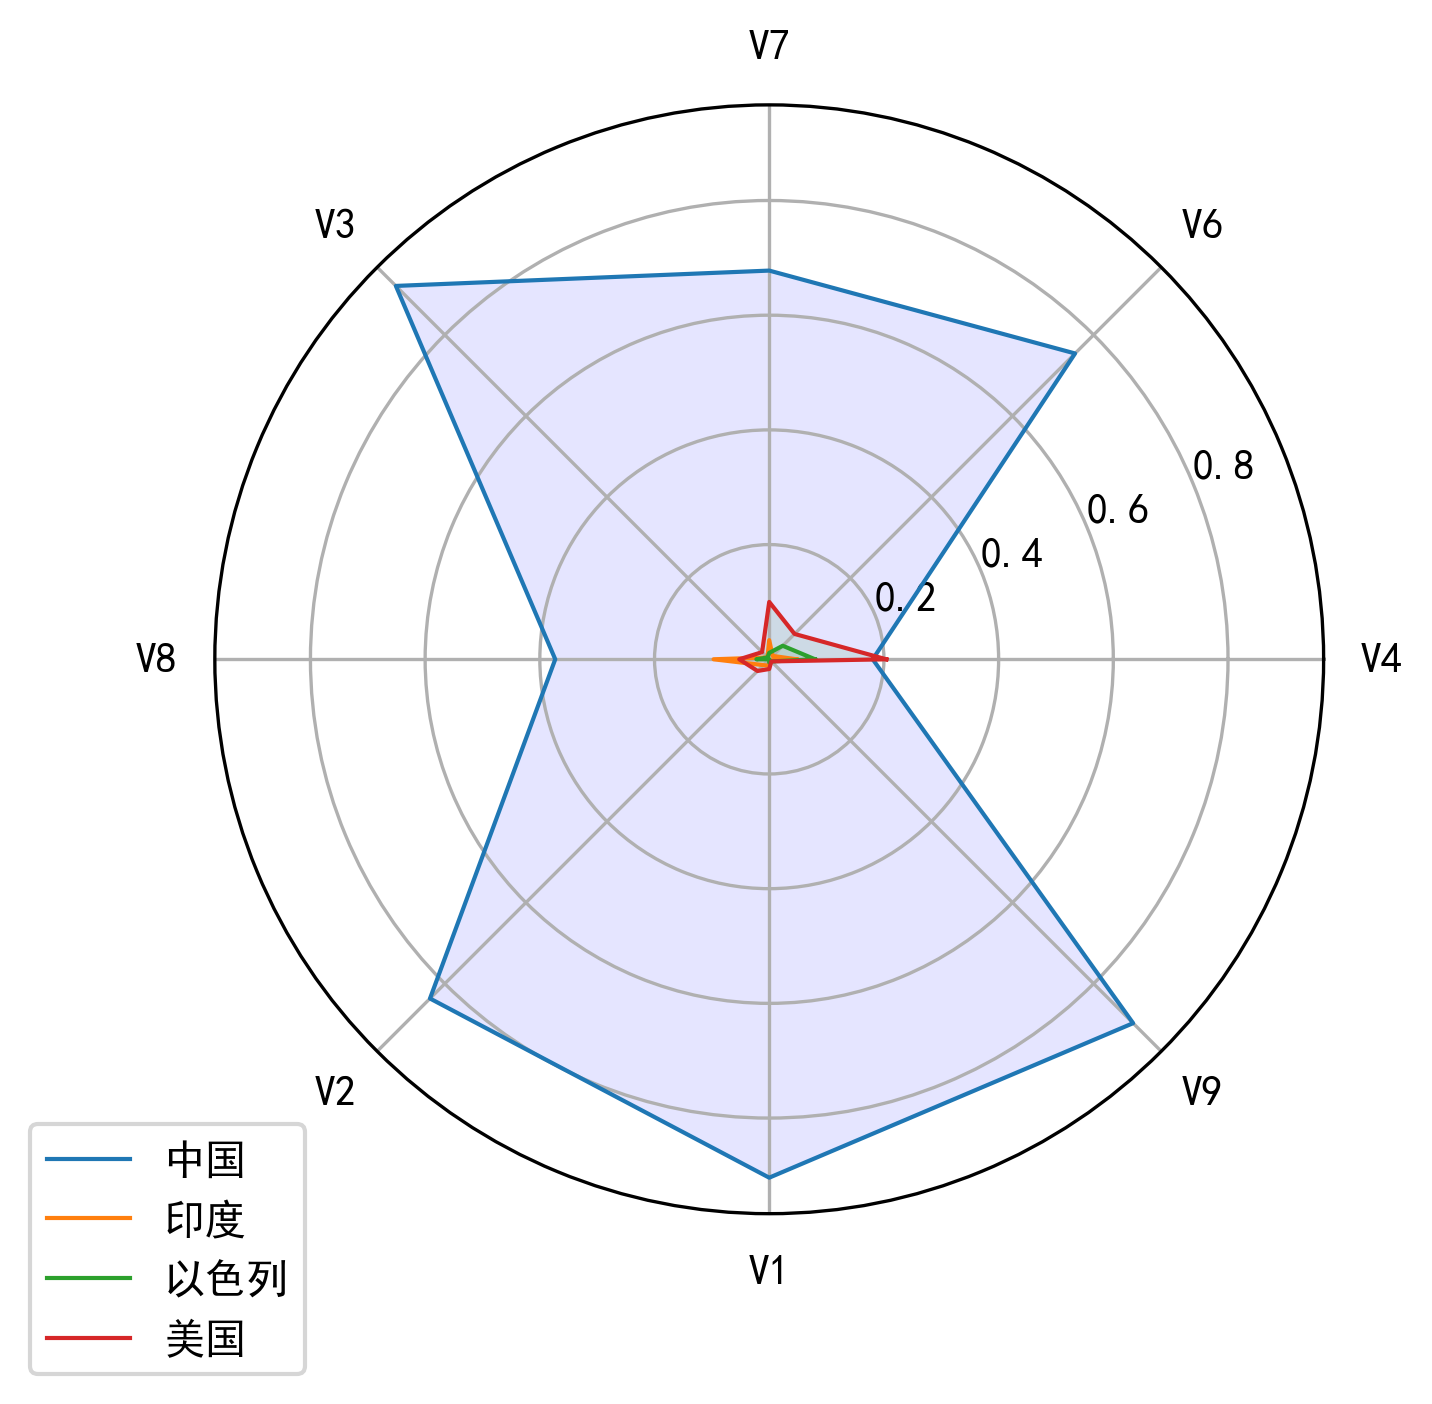

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi



countries_counts['China_指数'] = countries_counts['China'] / countries_counts['总量']
countries_counts['India_指数'] = countries_counts['India'] / countries_counts['总量']
countries_counts['Israel_指数'] = countries_counts['Israel'] / countries_counts['总量']
countries_counts['United States_指数'] = countries_counts['United States'] / countries_counts['总量']
countries_counts['Swizerland_指数'] = countries_counts['Swizerland'] / countries_counts['总量']


# 绘制雷达图数据准备
categories = list(countries_counts['topic'])
N = len(categories)

# 计算角度
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# 雷达图绘制
ax = plt.subplot(111, polar=True)

# 第一条线
values = countries_counts['China_指数'].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='中国')
ax.fill(angles, values, 'b', alpha=0.1)

# 第二条线
values = countries_counts['India_指数'].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='印度')
ax.fill(angles, values, 'r', alpha=0.1)

# 第三条线
values = countries_counts['Israel_指数'].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='以色列')
ax.fill(angles, values, 'g', alpha=0.1)

# 第4条线
values = countries_counts['United States_指数'].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='美国')
ax.fill(angles, values, 'g', alpha=0.1)


# 添加标签
plt.xticks(angles[:-1], categories)

# 添加图例
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig('雷达图.jpeg', dpi=1000)

plt.show()

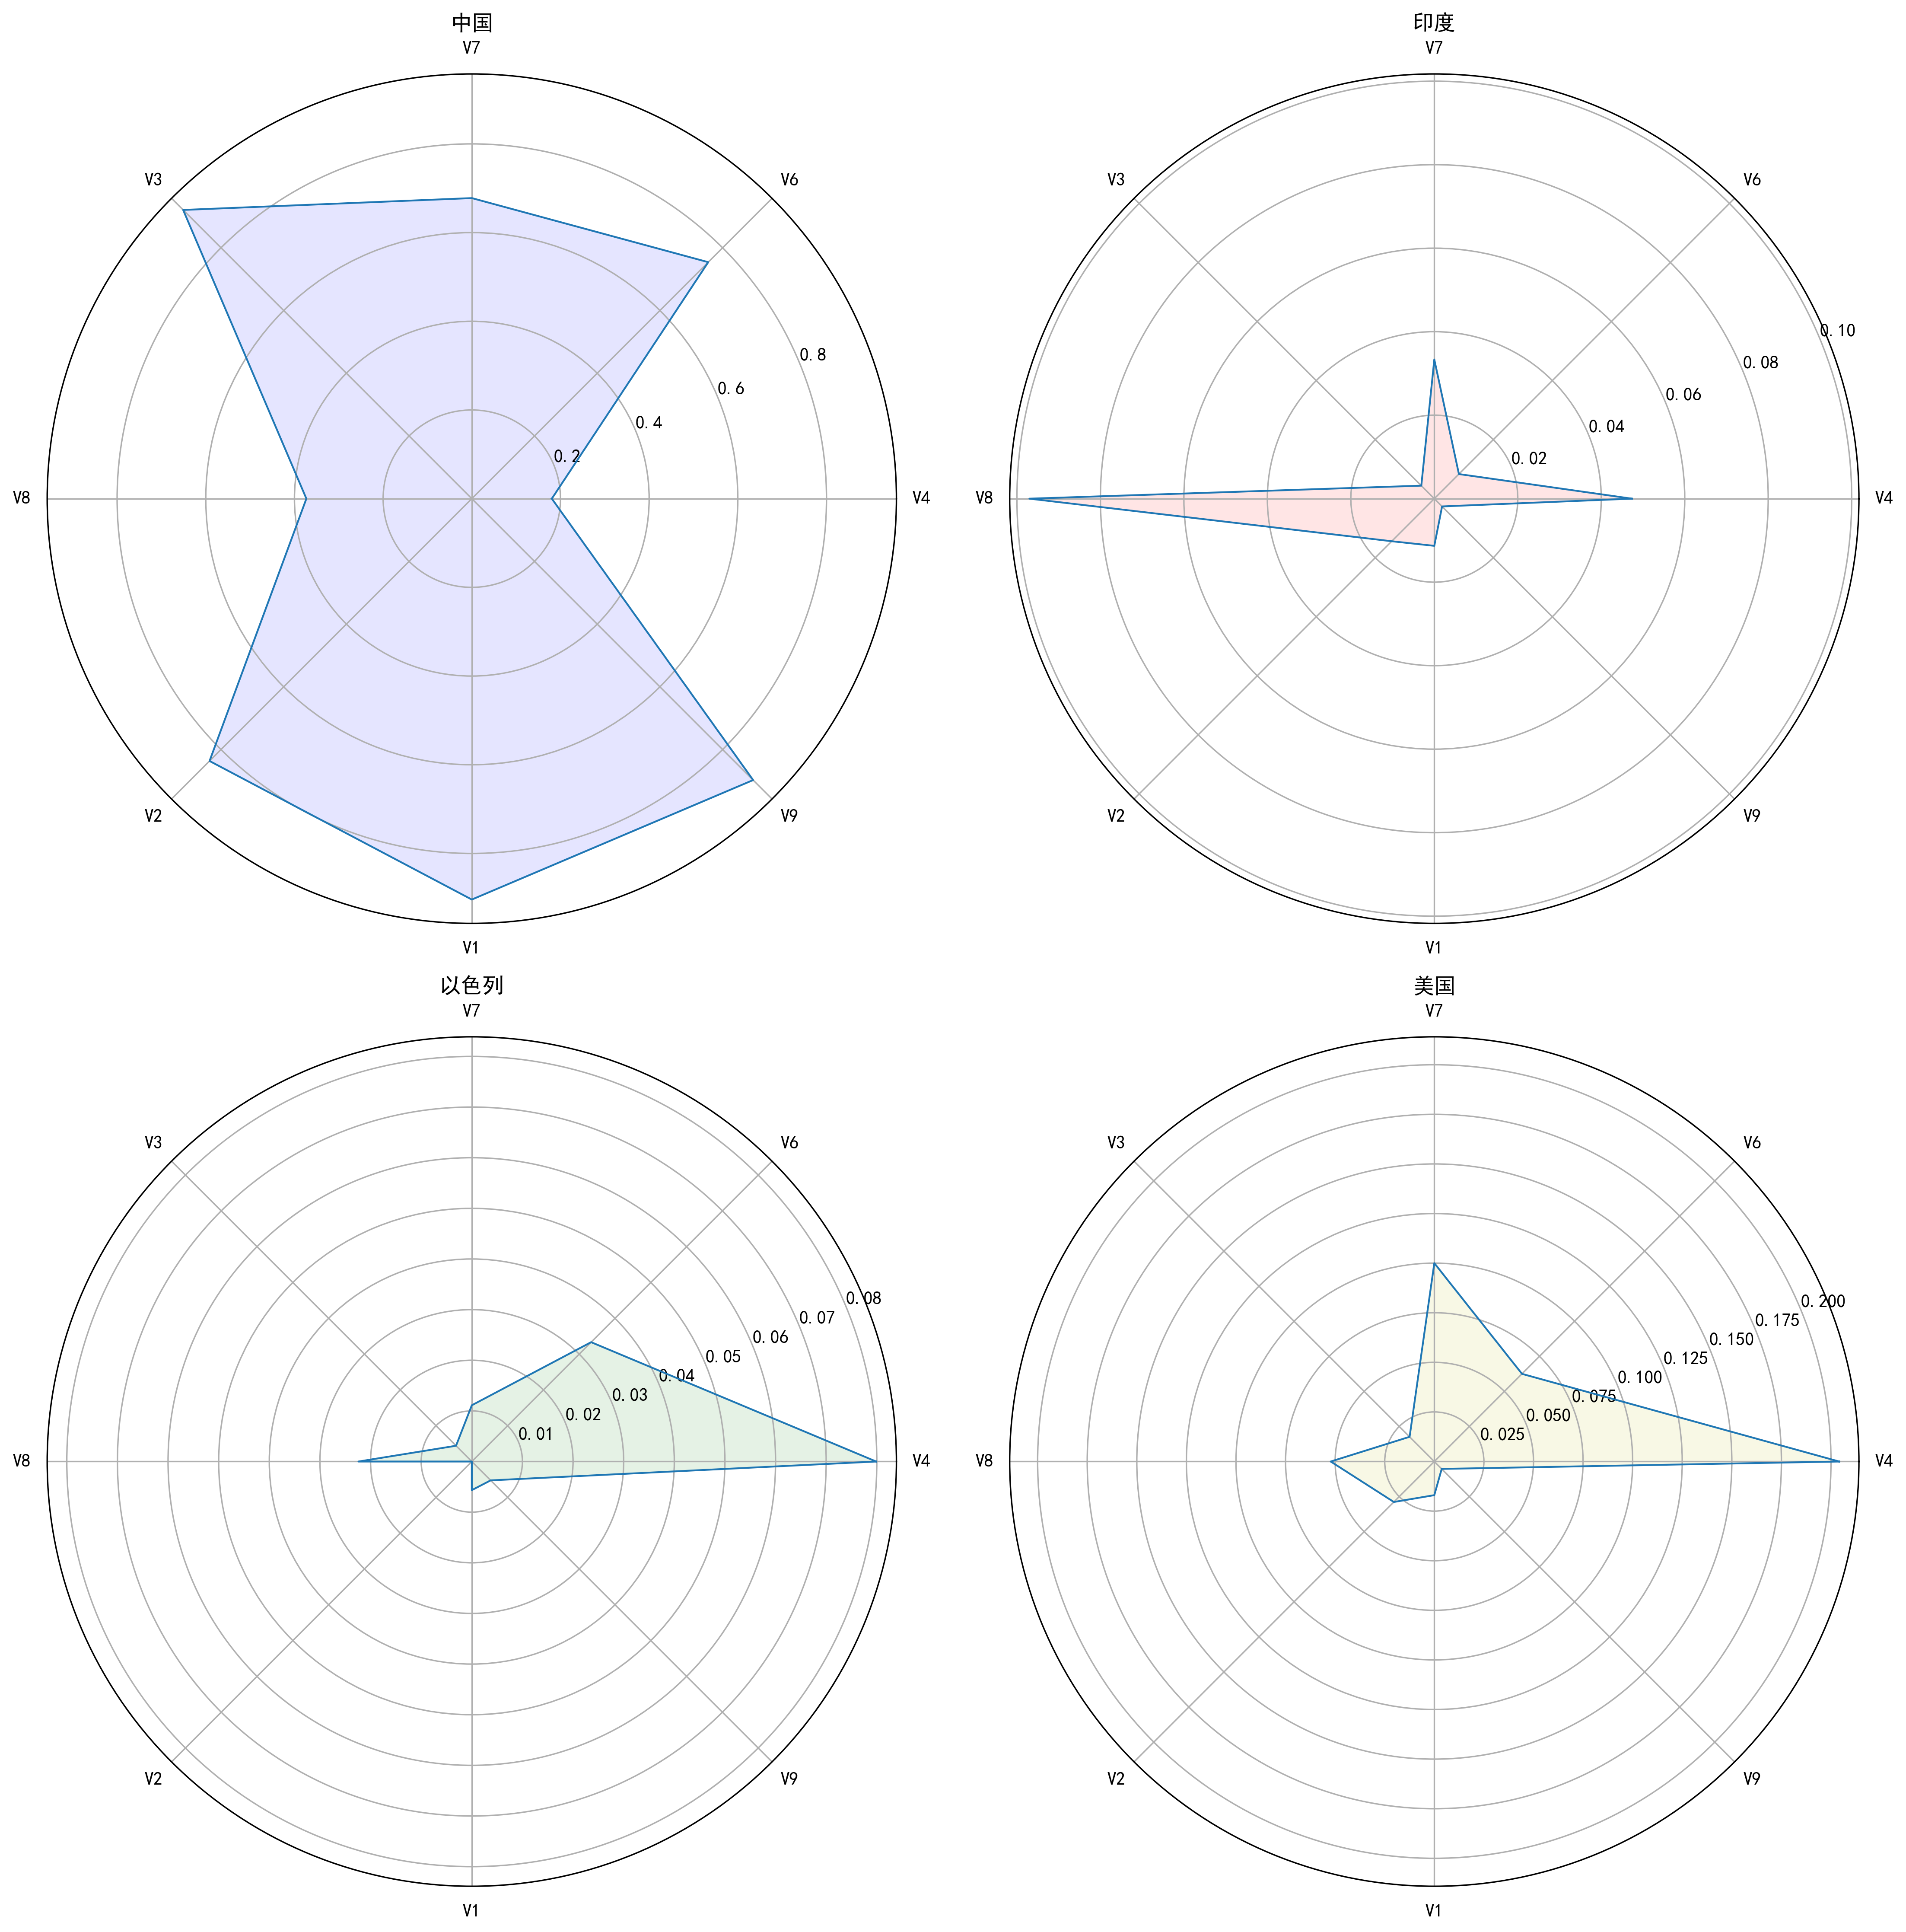

In [24]:
# 创建子图，3行2列
fig, axes = plt.subplots(2, 2, figsize=(15, 15), subplot_kw=dict(polar=True))

# 绘制China数据线
values = countries_counts['China_指数'].tolist()
values += values[:1]
axes[0, 0].plot(angles, values, linewidth=1, linestyle='solid', label='中国')
axes[0, 0].fill(angles, values, 'b', alpha=0.1)
axes[0, 0].set_xticks(angles[:-1])
axes[0, 0].set_xticklabels(categories)
axes[0, 0].set_title('中国')

# 绘制India数据线
values = countries_counts['India_指数'].tolist()
values += values[:1]
axes[0, 1].plot(angles, values, linewidth=1, linestyle='solid', label='印度')
axes[0, 1].fill(angles, values, 'r', alpha=0.1)
axes[0, 1].set_xticks(angles[:-1])
axes[0, 1].set_xticklabels(categories)
axes[0, 1].set_title('印度')

# 绘制South Korea数据线
values = countries_counts['Israel_指数'].tolist()
values += values[:1]
axes[1, 0].plot(angles, values, linewidth=1, linestyle='solid', label='以色列')
axes[1, 0].fill(angles, values, 'g', alpha=0.1)
axes[1, 0].set_xticks(angles[:-1])
axes[1, 0].set_xticklabels(categories)
axes[1, 0].set_title('以色列')

# 绘制The United States数据线
values = countries_counts['United States_指数'].tolist()
values += values[:1]
axes[1, 1].plot(angles, values, linewidth=1, linestyle='solid', label='美国')
axes[1, 1].fill(angles, values, 'y', alpha=0.1)
axes[1, 1].set_xticks(angles[:-1])
axes[1, 1].set_xticklabels(categories)
axes[1, 1].set_title('美国')
fig.delaxes(axes[1, 2])
# 移除空的子图

plt.tight_layout()
plt.savefig('雷达图国家.jpeg', dpi=1000)
plt.show()

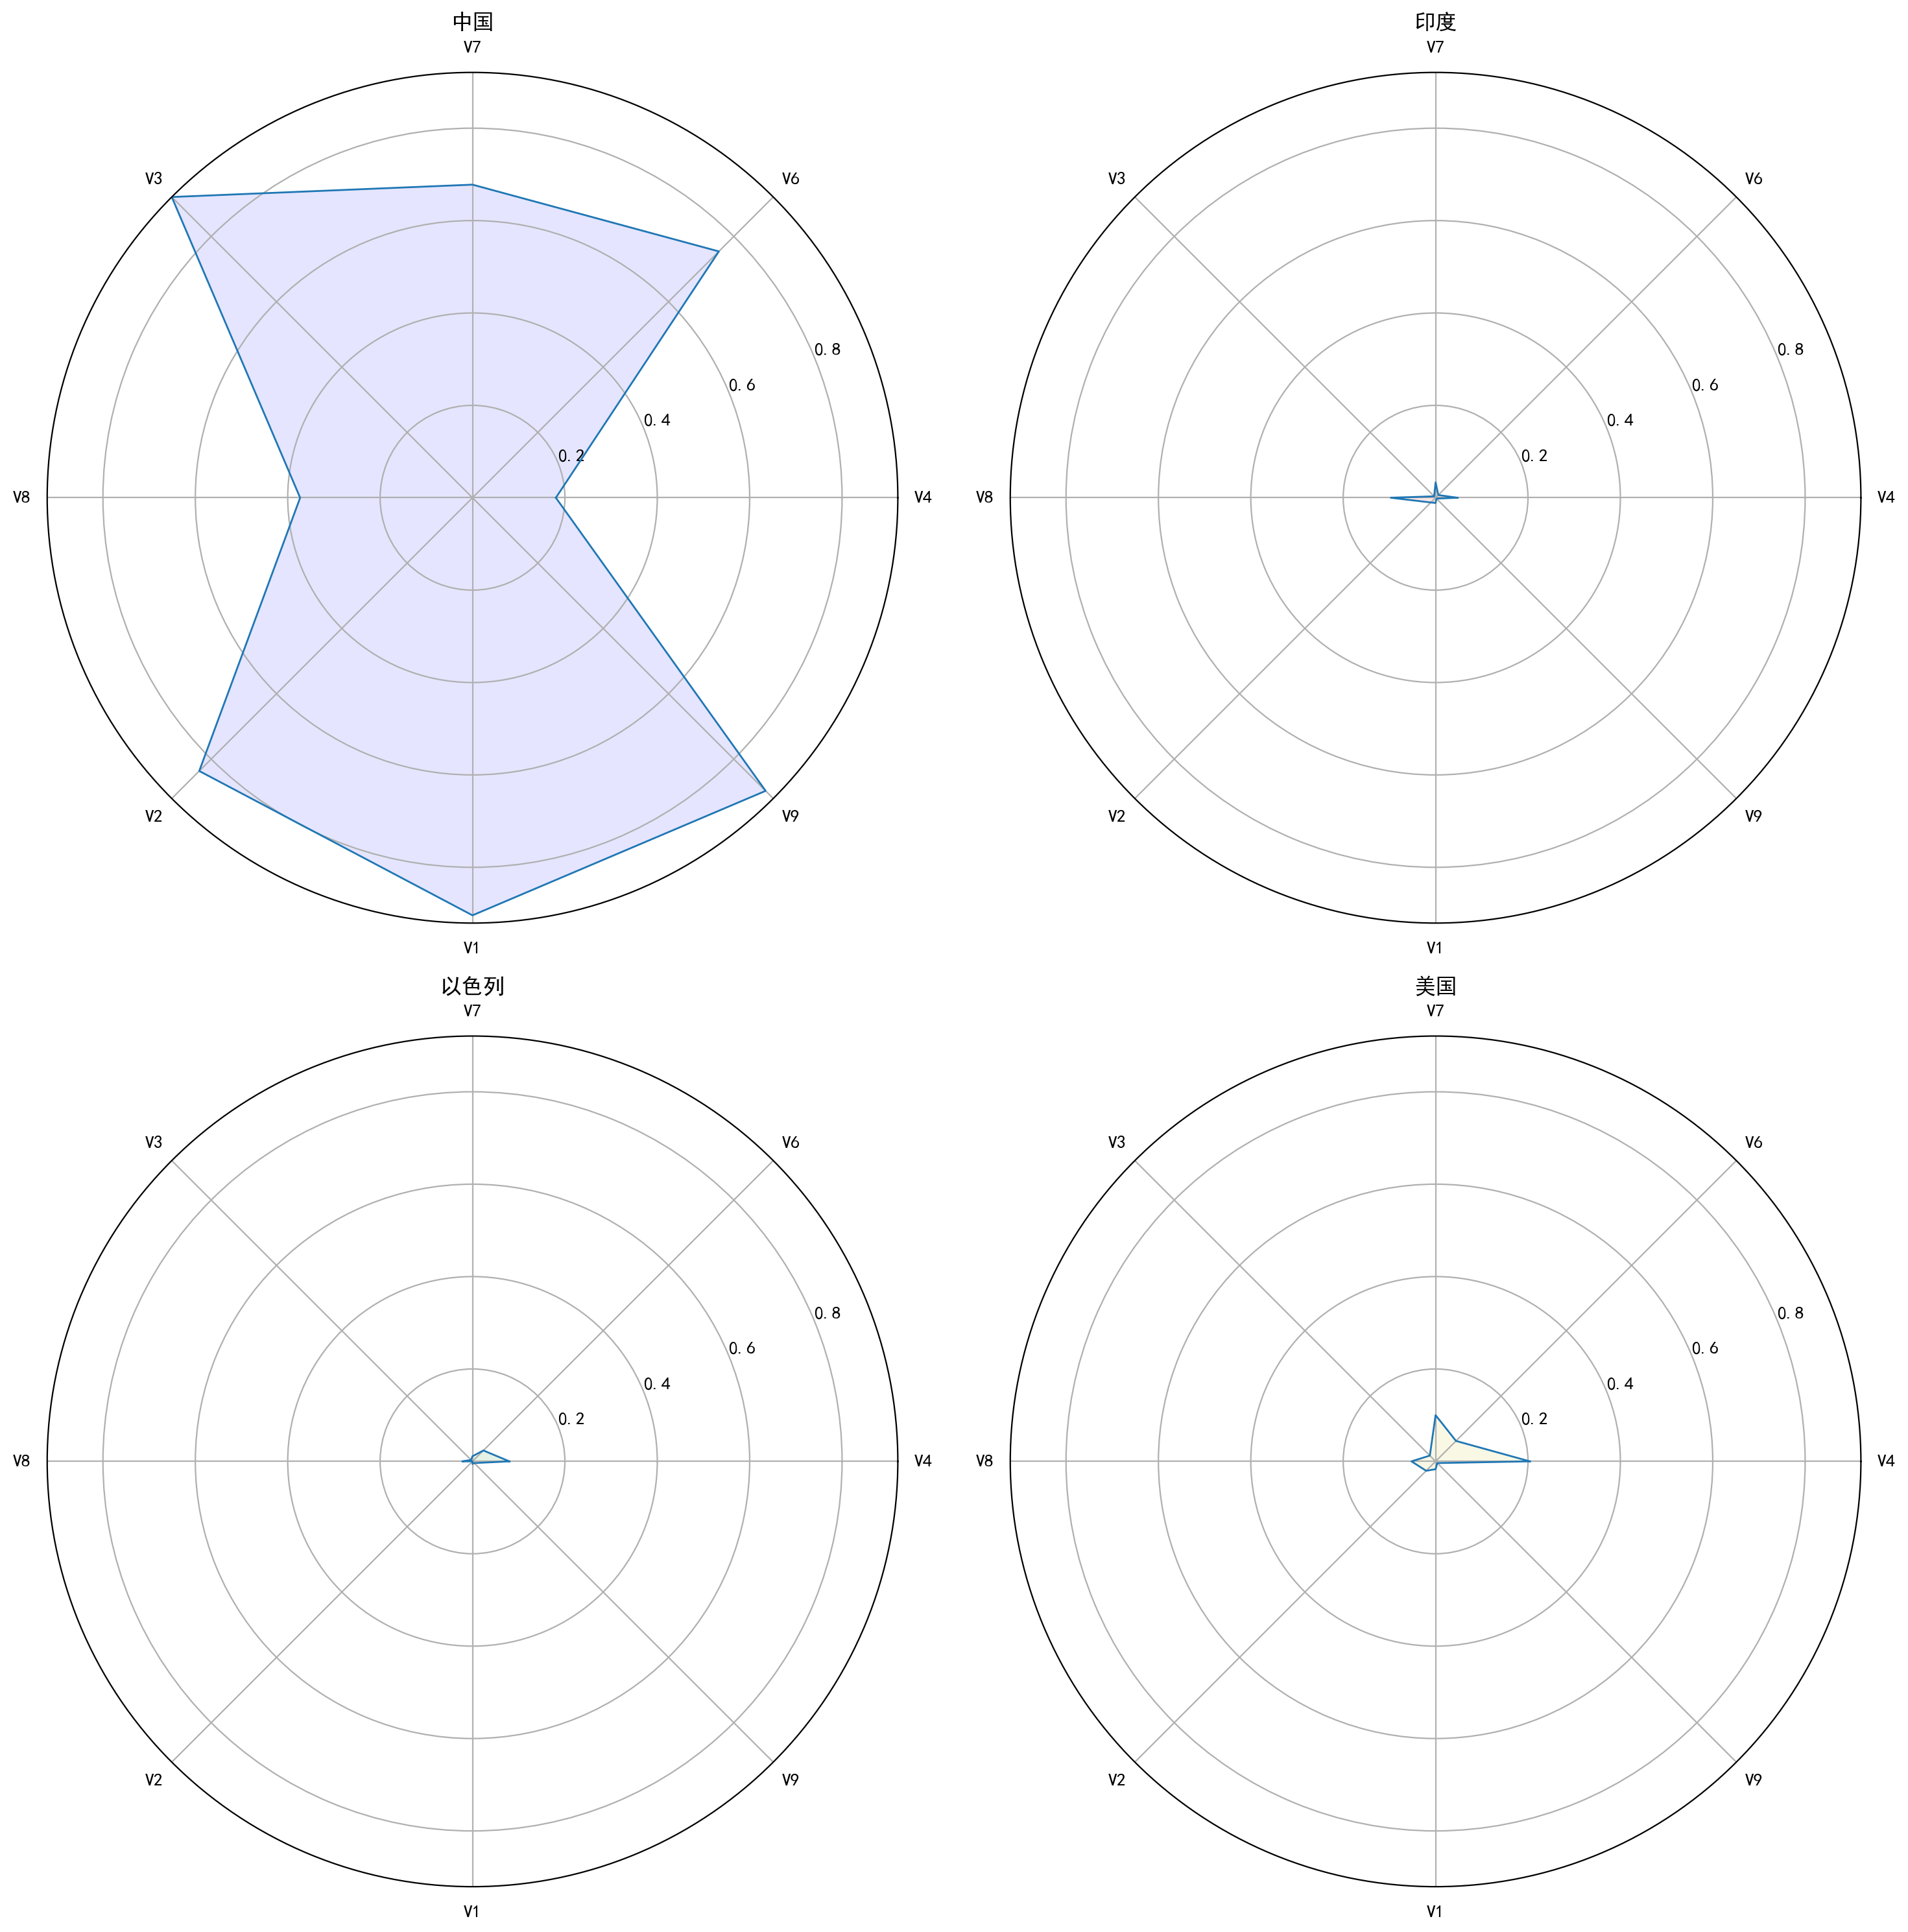

In [27]:
# 创建子图，2行2列
fig, axes = plt.subplots(2, 2, figsize=(15, 15), subplot_kw=dict(polar=True))

# 设置统一的尺度
max_value = max(countries_counts[['China_指数', 'India_指数', 'Israel_指数', 'United States_指数']].max())

# 绘制China数据线
values = countries_counts['China_指数'].tolist()
values += values[:1]
axes[0, 0].plot(angles, values, linewidth=1, linestyle='solid', label='中国')
axes[0, 0].fill(angles, values, 'b', alpha=0.1)
axes[0, 0].set_xticks(angles[:-1])
axes[0, 0].set_xticklabels(categories)
axes[0, 0].set_title('中国')
axes[0, 0].set_ylim(0, max_value)

# 绘制India数据线
values = countries_counts['India_指数'].tolist()
values += values[:1]
axes[0, 1].plot(angles, values, linewidth=1, linestyle='solid', label='印度')
axes[0, 1].fill(angles, values, 'r', alpha=0.1)
axes[0, 1].set_xticks(angles[:-1])
axes[0, 1].set_xticklabels(categories)
axes[0, 1].set_title('印度')
axes[0, 1].set_ylim(0, max_value)

# 绘制Israel数据线
values = countries_counts['Israel_指数'].tolist()
values += values[:1]
axes[1, 0].plot(angles, values, linewidth=1, linestyle='solid', label='以色列')
axes[1, 0].fill(angles, values, 'g', alpha=0.1)
axes[1, 0].set_xticks(angles[:-1])
axes[1, 0].set_xticklabels(categories)
axes[1, 0].set_title('以色列')
axes[1, 0].set_ylim(0, max_value)

# 绘制The United States数据线
values = countries_counts['United States_指数'].tolist()
values += values[:1]
axes[1, 1].plot(angles, values, linewidth=1, linestyle='solid', label='美国')
axes[1, 1].fill(angles, values, 'y', alpha=0.1)
axes[1, 1].set_xticks(angles[:-1])
axes[1, 1].set_xticklabels(categories)
axes[1, 1].set_title('美国')
axes[1, 1].set_ylim(0, max_value)

plt.tight_layout()
#plt.savefig('雷达图国家.jpeg', dpi=1000)
plt.show()

In [26]:
plt.rcParams['figure.dpi'] = 200